In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import requests
import pandas as pd

In [3]:
header = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'}

In [8]:
url = "https://finance.naver.com/item/sise_day.nhn?code=005930&page={}"

In [9]:
total = []
for cnt in range(1, 100):
  if cnt % 10 == 0 : print(cnt)
  total.append(pd.read_html(requests.get(url.format(cnt), headers=header).text)[0].dropna())

10
20
30
40
50
60
70
80
90


In [10]:
len(total)

99

In [11]:
df = pd.concat(total[::-1])

In [12]:
df.sort_values(by=['날짜']).reset_index(drop=True)

,날짜,종가,전일비,시가,고가,저가,거래량
0,2017.05.25,2284000.0,40000.0,2258000.0,2284000.0,2240000.0,260896.0
1,2017.05.26,2304000.0,20000.0,2280000.0,2323000.0,2277000.0,272273.0
2,2017.05.29,2281000.0,23000.0,2311000.0,2320000.0,2269000.0,174791.0
3,2017.05.30,2232000.0,49000.0,2276000.0,2283000.0,2224000.0,248672.0
4,2017.05.31,2235000.0,3000.0,2229000.0,2251000.0,2220000.0,373382.0
...,...,...,...,...,...,...,...
985,2021.05.31,80500.0,400.0,80300.0,80600.0,79600.0,13321324.0
986,2021.06.01,80600.0,100.0,80500.0,81300.0,80100.0,14058401.0
987,2021.06.02,80800.0,200.0,80400.0,81400.0,80300.0,16414644.0
988,2021.06.03,82800.0,2000.0,81300.0,83000.0,81100.0,29546007.0


In [13]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2017.06.08,2258000.0,7000.0,2250000.0,2279000.0,2250000.0,279575.0
2,2017.06.07,2265000.0,32000.0,2325000.0,2325000.0,2262000.0,274588.0
3,2017.06.05,2297000.0,1000.0,2302000.0,2318000.0,2286000.0,151988.0
4,2017.06.02,2298000.0,64000.0,2253000.0,2298000.0,2250000.0,249775.0
5,2017.06.01,2234000.0,1000.0,2243000.0,2245000.0,2220000.0,195070.0
...,...,...,...,...,...,...,...
9,2021.05.28,80100.0,500.0,79800.0,80400.0,79400.0,12360199.0
10,2021.05.27,79600.0,200.0,80000.0,80000.0,79100.0,23198510.0
11,2021.05.26,79800.0,100.0,80400.0,80500.0,79700.0,11984359.0
12,2021.05.25,79900.0,200.0,80000.0,80400.0,79800.0,13628942.0


In [15]:
df.set_index("날짜", inplace=True)

In [16]:
df.head(1)

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2017.06.08,2258000.0,7000.0,2250000.0,2279000.0,2250000.0,279575.0


In [17]:
df.columns = ['close', 'before', 'open', 'high', 'low', 'volume']

In [19]:
dfx = df[['open', 'high', 'low', 'volume', 'close']].copy()

In [20]:
dfx

,open,high,low,volume,close
날짜,,,,,
2017.06.08,2250000.0,2279000.0,2250000.0,279575.0,2258000.0
2017.06.07,2325000.0,2325000.0,2262000.0,274588.0,2265000.0
2017.06.05,2302000.0,2318000.0,2286000.0,151988.0,2297000.0
2017.06.02,2253000.0,2298000.0,2250000.0,249775.0,2298000.0
2017.06.01,2243000.0,2245000.0,2220000.0,195070.0,2234000.0
...,...,...,...,...,...
2021.05.28,79800.0,80400.0,79400.0,12360199.0,80100.0
2021.05.27,80000.0,80000.0,79100.0,23198510.0,79600.0
2021.05.26,80400.0,80500.0,79700.0,11984359.0,79800.0


In [21]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [22]:
dfx = MinMaxScaler(dfx)
dfy = dfx[['close']]

In [23]:
x = dfx.values.tolist()
y = dfy.values.tolist()

In [24]:
x #list로 만들어짐

[[0.7826086956521466,
  0.7924200278163841,
  0.7928118393234392,
  0.003095856886954695,
  0.7864390572151799],
 [0.8086956521738848,
  0.808414464534047,
  0.7970401691331642,
  0.0030406336434771197,
  0.7889182058047214],
 [0.8006956521738852,
  0.8059805285117939,
  0.8054968287526143,
  0.0016830299437877857,
  0.800251456499768],
 [0.7836521739130162,
  0.799026425591071,
  0.7928118393234392,
  0.0027658683857251505,
  0.8006056205839882],
 [0.7801739130434511,
  0.780598052851155,
  0.7822410147991268,
  0.0021600958702968874,
  0.7779391191938949],
 [0.77530434782606,
  0.7826842837273719,
  0.7822410147991268,
  0.00413462303913053,
  0.7782932832781152],
 [0.7916521739130159,
  0.7938108484005287,
  0.7836504580690351,
  0.002753654381803802,
  0.7772307910254546],
 [0.8038260869564937,
  0.8066759388038662,
  0.7995066948555039,
  0.0019355375878662188,
  0.7945848311522447],
 [0.793043478260842,
  0.8077190542419747,
  0.8023255813953205,
  0.003014998630713818,
  0.80273

In [25]:
y #종가 예측

[[0.7864390572151799],
 [0.7889182058047214],
 [0.800251456499768],
 [0.8006056205839882],
 [0.7779391191938949],
 [0.7782932832781152],
 [0.7772307910254546],
 [0.7945848311522447],
 [0.8027306050893094],
 [0.7956473234049053],
 [0.8360220290060089],
 [0.8275220909847238],
 [0.8392095057639907],
 [0.8112305431105944],
 [0.7938765029838043],
 [0.7956473234049053],
 [0.789980698057382],
 [0.7906890262258224],
 [0.7903348621416022],
 [0.8030847691735297],
 [0.8377928494271099],
 [0.829292911405825],
 [0.8190221529634389],
 [0.8229179578898612],
 [0.8285845832373845],
 [0.8356678649217887],
 [0.8314178959111461],
 [0.8420428184377524],
 [0.8416886543535321],
 [0.8300012395742653],
 [0.8933966106496823],
 [0.8852508367126176],
 [0.8870216571337186],
 [0.8834800162915165],
 [0.8806467036177549],
 [0.8820633599546357],
 [0.8700217810911487],
 [0.8544385613854596],
 [0.848417771953716],
 [0.8342512085849079],
 [0.832834552248027],
 [0.8544385613854596],
 [0.8473552797010555],
 [0.840271998016

In [27]:
window_size = 10 #과거 데이터 며칠치를 가지고 예측할까를 의미
data_size = 5 #며칠치를 볼 건데, 어떤어떤 특징을 볼 것인지 -> df[['open', 'high', 'low', 'volume', 'close']]

In [28]:
data_x = []
data_y = []

for i in range(len(y) - window_size): #10일 이후부터 예측가능하기 때문에 window_size만큼 빼서 range함수 생성 
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

[[0.028452173913042486, 0.02854659248956785, 0.028717406624382356, 0.1567432314181563, 0.015742593543588188], [0.028765217391303347, 0.02875521557718954, 0.028717406624382356, 0.18688683942406265, 0.015813426360432228], [0.028278260869564233, 0.028859527121000386, 0.02857646229739152, 0.32717592507542387, 0.016061341219386373], [0.027965217391303376, 0.02830319888734255, 0.028294573643409853, 0.18176656952270254, 0.01535301305094596], [0.027999999999999026, 0.02826842837273893, 0.028224101479914436, 0.15567485488838692, 0.015282180234101918], [0.027930434782607722, 0.02802503477051363, 0.028047921071175895, 0.14751287721990472, 0.015246763825679898], [0.02775652173912947, 0.0279554937413064, 0.027977448907680478, 0.13686991754727904, 0.015105098191991814], [0.02782608695652077, 0.02781641168289194, 0.027871740662437354, 0.2568873001898859, 0.014928016149881712], [0.027965217391303376, 0.027990264255910013, 0.028083157152923605, 0.1327080759935169, 0.014998848966725752], [0.027826086956

In [29]:
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

In [30]:
# 모델 생성
model = Sequential() #시퀀스 메소드를 사용한 모델 생성
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            640       
_________________________________________________________________
dropout (Dropout)            (None, 10, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

Epoch 1/60
23/23 [==============================] - 5s 34ms/step - loss: 0.2171
Epoch 2/60
23/23 [==============================] - 1s 32ms/step - loss: 0.1519
Epoch 3/60
23/23 [==============================] - 1s 34ms/step - loss: 0.0438
Epoch 4/60
23/23 [==============================] - 1s 33ms/step - loss: 0.0226
Epoch 5/60
23/23 [==============================] - 1s 34ms/step - loss: 0.0173
Epoch 6/60
23/23 [==============================] - 1s 33ms/step - loss: 0.0141
Epoch 7/60
23/23 [==============================] - 1s 34ms/step - loss: 0.0132
Epoch 8/60
23/23 [==============================] - 1s 32ms/step - loss: 0.0129
Epoch 9/60
23/23 [==============================] - 1s 34ms/step - loss: 0.0154
Epoch 10/60
23/23 [==============================] - 1s 34ms/step - loss: 0.0130
Epoch 11/60
23/23 [==============================] - 1s 36ms/step - loss: 0.0109
Epoch 12/60
23/23 [==============================] - 1s 33ms/step - loss: 0.0119
Epoch 13/60
23/23 [==================

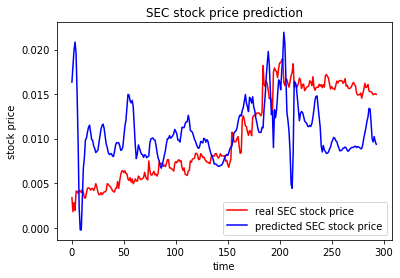

In [32]:
# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [34]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", df.close[-1] * pred_y[-1] / dfy.close[-1], 'KRW')

Tomorrow's SEC price : [49860.688] KRW
